In [8]:
#4 Choosing Models

In [1]:
#Import stuff

import emcee
import cPickle
import scipy.optimize as op
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def pickle_from_file(fname):
    fh = open(fname, 'r')
    data = cPickle.load(fh)
    fh.close()
    return data

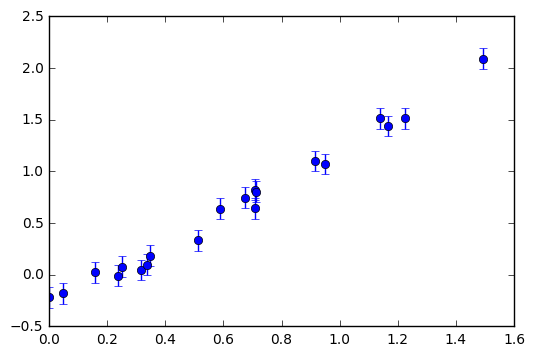

In [3]:
# a) Read data and plot it

d = pickle_from_file('data-for-poly-test.pkl')

plt.errorbar(d['x'], d['y'], yerr=d['sigma_y'], fmt='o')
plt.show()

9
9


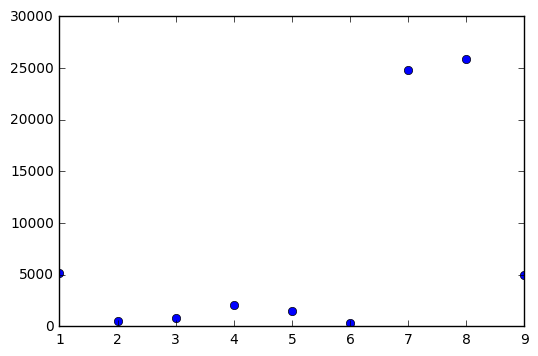

In [5]:
# b) Define likelihoods for different polynomials and plot them

#Define likelihook  (a) and (b)
def neglnL(theta, x, y, yerr, n):
    model = np.polynomial.polynomial.polyval(x, theta)
    inv_sigma2 = 1.0/(yerr**2)
    return 0.5*(np.sum((y-model)**2*inv_sigma2))

#def lnL(theta, x, y, yerr):
#    model = np.polynomial.polynomial.polypow(theta, n, maxpower=None)
#    inv_sigma2 = 1.0/(yerr**2)
#    return -0.5*(np.sum((y-model)**2*inv_sigma2))

n=9
array_ml = []
nums=[]
for i in range (1, n+1):
    theta = np.random.randn(i)
    array_ml.append(neglnL(theta, d['x'], d['y'], d['sigma_y'], i))
    nums.append(i)
print len(array_ml)
print len(nums)
plt.plot(nums, array_ml, 'o')

In [ ]:
# c) Using the BIC and AIC criteria to see which polynomial is better

